#Visualização de dados com a biblioteca Matplotlib

Referências:

- [Tutoriais recomendados pela documentação da biblioteca](https://matplotlib.org/3.3.2/tutorials/index.html)
- [Python Data Science Handbook](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb#scrollTo=n_Q7v5lEP4tf)
- [Matplotlib Tutorial: Python Plotting (DataCamp)](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python)
- [Matplotlib: - Exercises, Practice, Solution (W3resource)](https://www.w3resource.com/graphics/matplotlib/index.php)
- [A step-by-step guide for creating advanced Python data visualizations with Seaborn / Matplotlib](https://towardsdatascience.com/a-step-by-step-guide-for-creating-advanced-python-data-visualizations-with-seaborn-matplotlib-1579d6a1a7d0)
- [Data Science with Python: Intro to Data Visualization with Matplotlib](https://towardsdatascience.com/data-science-with-python-intro-to-data-visualization-and-matplotlib-5f799b7c6d82)


## Tópicos gerais do Matplotlib 



Antes de começarmos a discutir detalhes da criação de visualizações com o Matplotlib, existem algumas coisas úteis que você deve saber sobre o uso do pacote.

### Importação da biblioteca

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### Como exibir os seus gráficos

Como você vê seus gráficos Matplotlib depende do contexto.
O melhor uso do Matplotlib difere dependendo de como você o está usando.

Os dois principais contextos aplicáveis são: usando Matplotlib em um script ou em um notebook IPython.

#### Plotagem a partir de um script

Se você estiver usando Matplotlib dentro de um script, você precisará da função ``plt.show()``.

`` plt.show() `` inicia uma busca por todos os objetos de figura atualmente ativos e abre uma ou mais janelas interativas que exibem sua figura ou figuras (como veremos mais a frente, uma figura é um container que contém um ou mais gráficos).

Portanto, por exemplo, você pode ter um arquivo chamado *myplot.py* contendo o seguinte:

```python
# ------- arquivo: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

Você pode então executar este script a partir do prompt da linha de comando, o que resultará na abertura de uma janela com sua figura exibida:

```
$ python myplot.py
```

Uma coisa a estar atento: o comando `` plt.show() `` deve ser usado **apenas uma vez** por sessão Python, e é mais frequentemente visto no final do script.
Múltiplos comandos `` show() `` podem levar a um comportamento imprevisível e devem ser evitados.

#### Plotagem de um notebook IPython

A plotagem interativa em um notebook IPython pode ser feita com o comando ``%matplotlib``. Para incorporar gráficos diretamente no notebook, temos duas opções possíveis:

- ``%matplotlib notebook`` levará a gráficos interativos embutidos no notebook
- ``%matplotlib inline`` levará a imagens estáticas embutidas no notebook

A opção geralmente utilizada é a ``%matplotlib inline``:

In [ ]:
%matplotlib inline

Depois de executar este comando (precisa ser feito apenas uma vez por kernel / sessão), qualquer célula dentro do notebook que cria um gráfico irá incorporar uma imagem PNG do gráfico resultante:

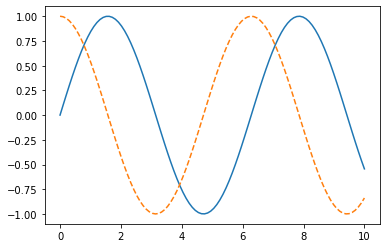

In [ ]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### Anatomia de uma figura 

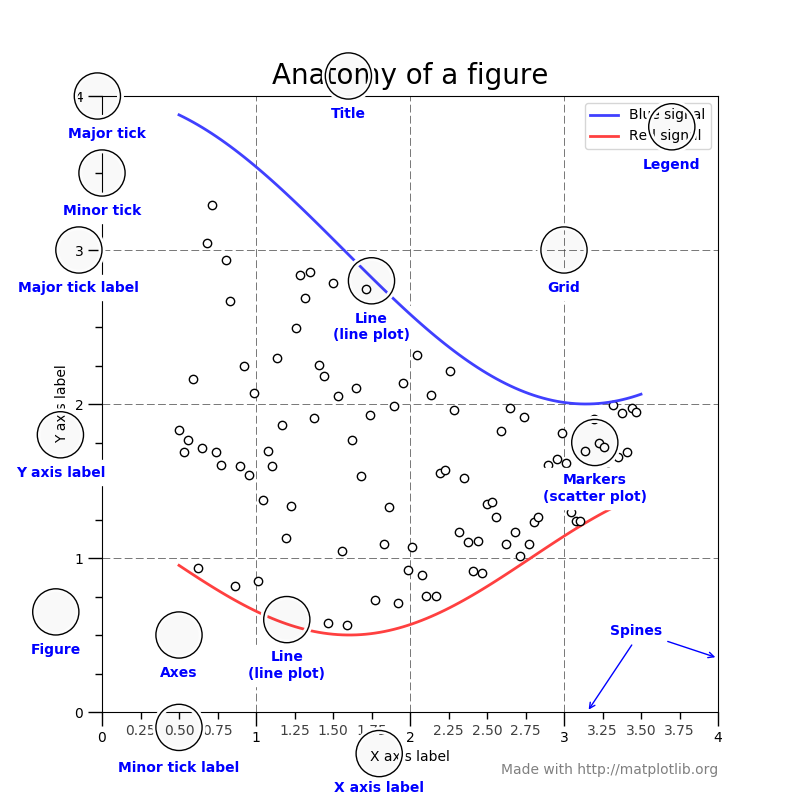

**Figure**

O objeto ``Figure`` é o container que engloba toda a imagem. Dentro dela estão todos os objetos da classe ``Axes``. 

A partir deste ponto nos referiremos aos objetos da classe ``Axes`` como *painéis*, para evitar confusão com os eixos x e y dos gráficos, que são objetos da classe ``Axis``.

A maneira mais fácil de criar uma nova figura é com o pyplot:

<Figure size 432x288 with 0 Axes>

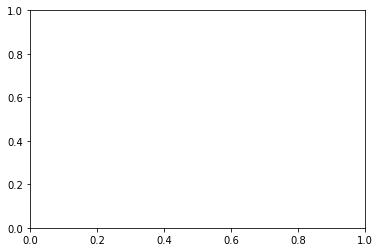

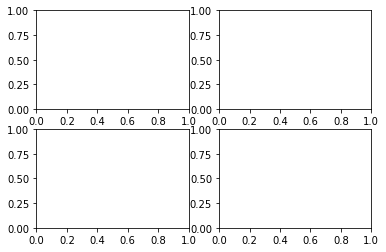

In [ ]:
fig = plt.figure()  # cria uma figura vazia, sem painéis.
fig, ax = plt.subplots()  # cria uma figura com apenas um painel.
fig, axs = plt.subplots(2, 2)  # cria uma figura com uma grade 2x2 de painéis.

**Axes**

São o que chamamos aqui de painéis. É a região onde o gráfico é apresentado. Uma determinada figura pode conter muitos painéis, mas um determinado objeto da classe ``Axes`` só pode estar em uma figura. Os painéis pode conter objetos de ``Axis`` (esteja ciente da diferença entre ``Axes`` e ``Axis``) que cuidam dos limites de dados.

Os limites de dados também podem ser controlados por meio dos métodos ``set_xlim()`` e métodos ``set_ylim()``. Cada painel tem um título (definido por ``set_title()``), um rótulo para o eixo x (definido por ``set_xlabel()``) e um rótulo para o eixo y definido por ``set_ylabel()``).


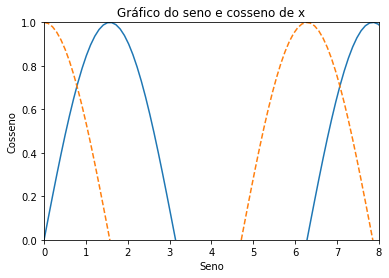

In [ ]:
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots() 
ax.set_xlim(0, 8)
ax.set_ylim(0, 1)
ax.set_xlabel('Seno')
ax.set_ylabel('Cosseno')
ax.set_title('Gráfico do seno e cosseno de x')
ax.plot(x, np.sin(x), '-')
ax.plot(x, np.cos(x), '--')

In [ ]:
ax.plot(x, np.tan(x), '--')

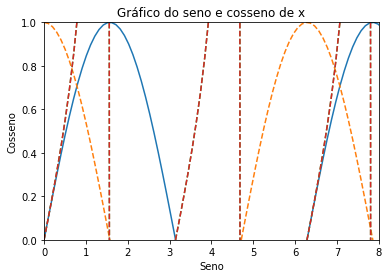

In [ ]:
ax.plot(x, np.tan(x), '--')
fig


### Interfaces do Matplotib

Um recurso potencialmente confuso do Matplotlib são suas duas interfaces: uma interface mais simples, baseada no MATLAB e outra interface orientada a objetos, mais poderosa. Vamos destacar rapidamente as diferenças entre os dois aqui.

#### Interface Pyplot

Matplotlib foi originalmente escrito como uma alternativa Python para usuários MATLAB, e muito de sua sintaxe reflete esse fato.
As ferramentas de estilo MATLAB estão contidas na interface pyplot (`` plt``).
Por exemplo, o código a seguir provavelmente parecerá bastante familiar para os usuários do MATLAB:

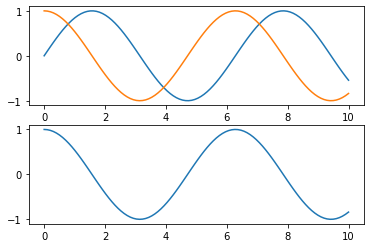

In [ ]:
plt.figure() #Cria a figura onde serão apresentados os gráficos

# cria o primeiro de dois painéis
plt.subplot(2, 1, 1) # (linhas, colunas, índice)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

# cria o segundo painel
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

Essa interface é tambem conhecida como *interface baseada em estado*, isto porque ela mantém o controle apenas da figura e eixo mais recentemente gerados, que são onde todos os comandos `` plt`` são aplicados.

Embora essa interface baseada em estado seja rápida e conveniente para plotagens simples, é fácil ter problemas. Por exemplo, uma vez que o segundo painel é criado, voltar e adicionar algo ao primeiro não é uma tarefa trivial.

Felizmente, existe outro caminho.

#### Interface orientada a objeto

A interface orientada a objetos está disponível para essas situações mais complicadas e para quando você precisar de mais controle sobre sua figura.

Em vez de depender de alguma noção de figura ou eixo mais recente, na interface orientada a objetos as funções de plotagem são *métodos* de objetos `` Figure`` e ``Axes`` explícitos.

Para recriar o gráfico anterior usando este estilo de plotagem, você pode fazer o seguinte:

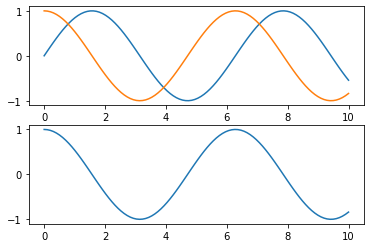

In [ ]:
fig, ax = plt.subplots(2) #cria uma figura e dois eixos dentro dela.

# chama o método plot() no eixo desejado.
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));
ax[0].plot(x, np.cos(x));

Para plotagens mais simples, a escolha de qual estilo usar é em grande parte uma questão de preferência, mas a abordagem orientada a objetos pode se tornar uma necessidade à medida que as plotagens se tornam mais complicadas.

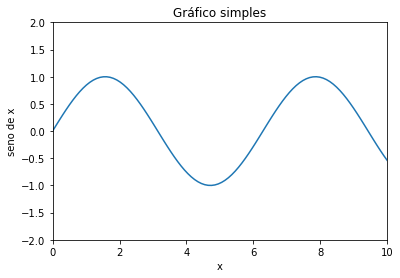

In [ ]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='seno de x',
       title='Gráfico simples');

### Definição de estilo

A biblioteca provê alguns estilos prontos para encurtar o trabalho de configurar cada detalhe estético dos seus gráficos. Segue abaixo o nome dos estilos disponíveis:

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

A maneira básica de mudar para um estilo é chamar

```python
plt.style.use('nome do estilo')
```

Mas lembre-se de que isso mudará o estilo pelo resto da sessão!

Como alternativa, você pode usar o gerenciador de contexto de estilo, que define um estilo temporariamente:

```python
with plt.style.context('stylename'):
     make_a_plot()
```

Vamos criar uma função que fará dois tipos básicos de plotagem:

In [ ]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))

    # Cria um histograma de um array com 1000 números aleatórios normalmente distribuídos.
    ax[0].hist(np.random.randn(1000)) 

    # Cria um gráfico de linha
    for i in range(3):
        ax[1].plot(np.random.rand(10))

    # Cria uma legenda para o gráfico de linha e a posiciona no canto inferior esquerdo.
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

Agora vamos conhecer alguns estilos e escolher um.

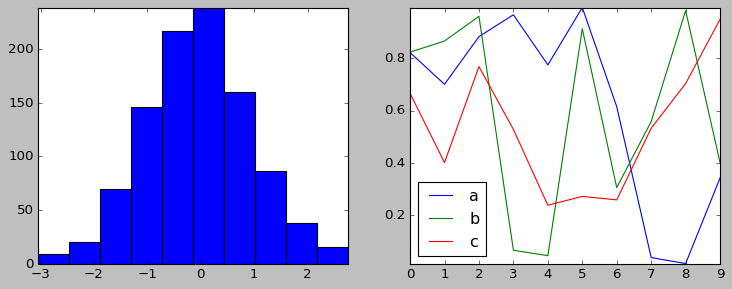

In [ ]:
with plt.style.context('classic'):
    hist_and_lines()

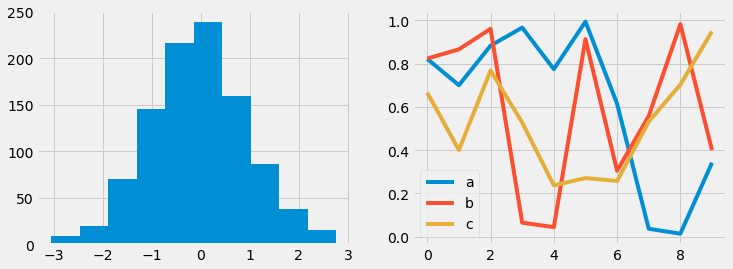

In [ ]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

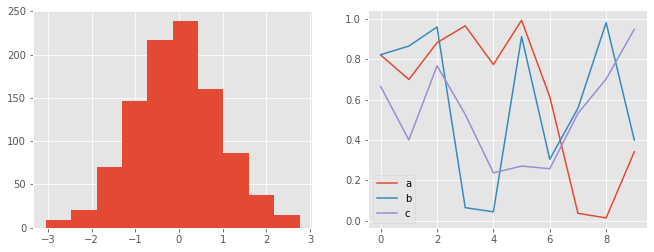

In [ ]:
with plt.style.context('ggplot'):
    hist_and_lines()

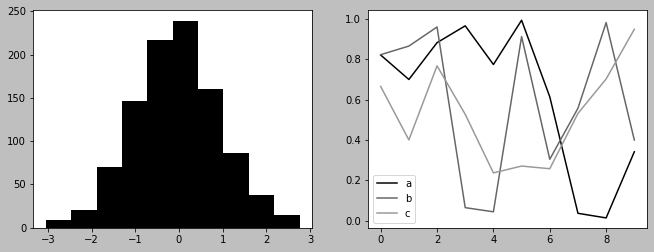

In [ ]:
with plt.style.context('grayscale'):
    hist_and_lines()

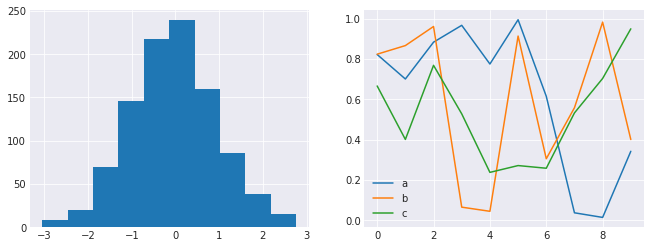

In [ ]:
with plt.style.context('seaborn-darkgrid'):
    hist_and_lines()

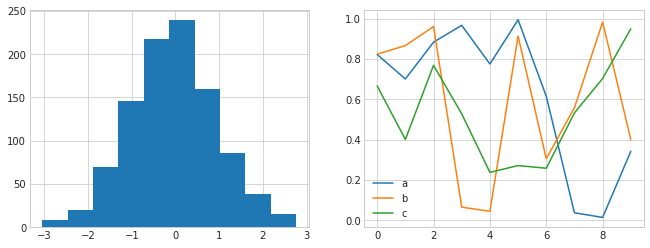

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    hist_and_lines()

Vamos utilizar aqui o estilo ``seaborn-whitegrid``

Antes:

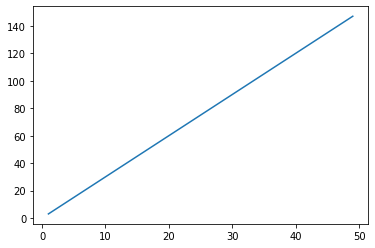

In [ ]:
X = range(1, 50)
Y = [value * 3 for value in X]

plt.plot(X, Y);

Depois:

In [ ]:
plt.style.use('seaborn-whitegrid')

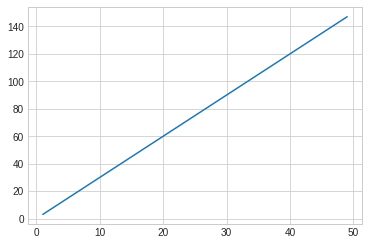

In [ ]:

plt.plot(X, Y);

## Tipos de gráficos

Agora que entendemos o funcionamento geral da biblioteca Matplotlib, vamos conhecer alguns dos principais tipos de gráficos que ela dispõe, além de quando e como utilizá-los.

Antes de seguir, vamos definir algumas configurações padrão para todas as figuras a serem geradas a partir daqui utilizando o dicionário de configurações padrão do Matplotlib, ``matplotlib.rcParams``. 

[Clique aqui](https://matplotlib.org/tutorials/introductory/customizing.html#matplotlibrc-sample) Para conhecer todas as configurações disponíveis.

In [ ]:
mpl.rcParams["figure.figsize"] = [10, 7]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['axes.labelsize'] = 'medium'
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

### Gráfico de Linha  (x: categórico ordinal, y: numérico) 

Esse gráfico que exibe informações como uma série de pontos de dados chamados "marcadores" conectados por linhas retas.

É geralmente utilizado para exprimir o fluxo de crescimento/decrescimento de uma variável quantitativa ao longo do tempo. Por esse motivo, é importante que o eixo x represente uma variável categórica ordinal e que os pontos estejam ordenados por este eixo.

Para fazer um gráfico de linha com Matplotlib, chamamos ``plt.plot(x, y)``, sendo *x* os dados no eixo horizontal e *y* os dados no eixo vertical. Uma variação dessa chamada é ``plt.plot(x_label, y_label, data=df)``, onde *data* recebe um dataframe e *x_label* e *y_label* são os nomes das colunas que serão utilizadas como dados dos eixos *x* e *y* respectivamente.

Utilizando a interface orientada a objeto, ao invés de utilizar ``plt.plot()`` utiliza-se ``ax.plot()``, sendo ax um objeto do tipo ``Axes``.



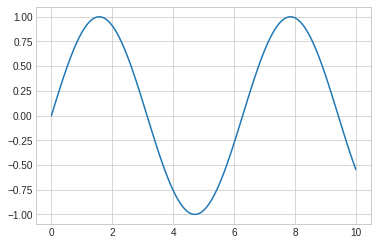

In [ ]:
plt.plot(x, np.sin(x));

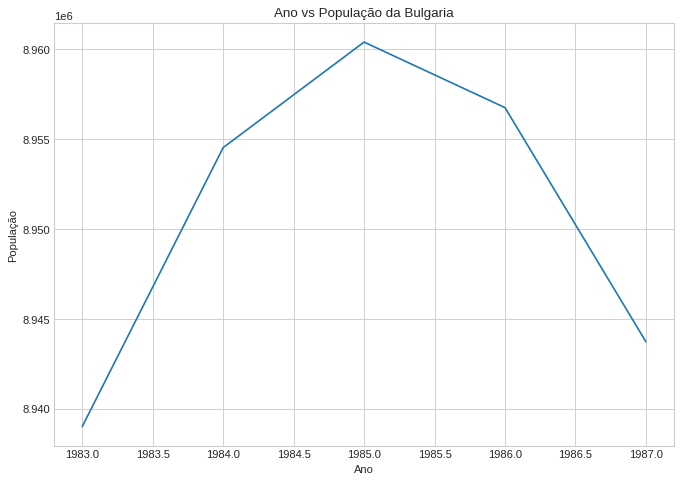

In [ ]:
years = [1983, 1984, 1985, 1986, 1987]
total_populations = [8939007, 8954518, 8960387, 8956741, 8943721]

fig, ax = plt.subplots()
ax.set_title("Ano vs População da Bulgaria")
ax.set_xlabel("Ano")
ax.set_ylabel("População")
ax.plot(years, total_populations)

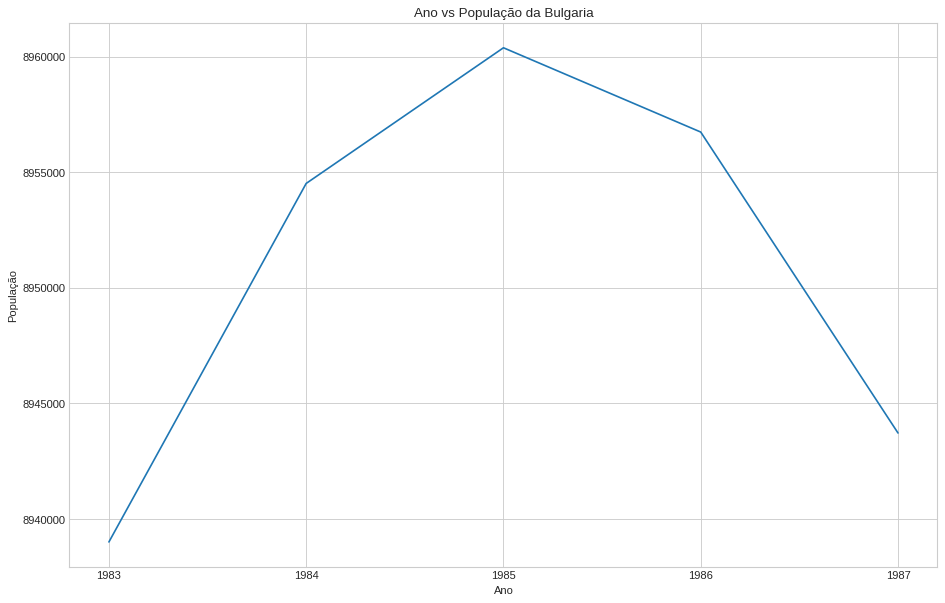

In [ ]:
ax.ticklabel_format(style='plain')
ax.set_xticks(years)
fig.set_size_inches(14,9)
fig

Podemos também plotar diversas linhas no mesmo gráfico

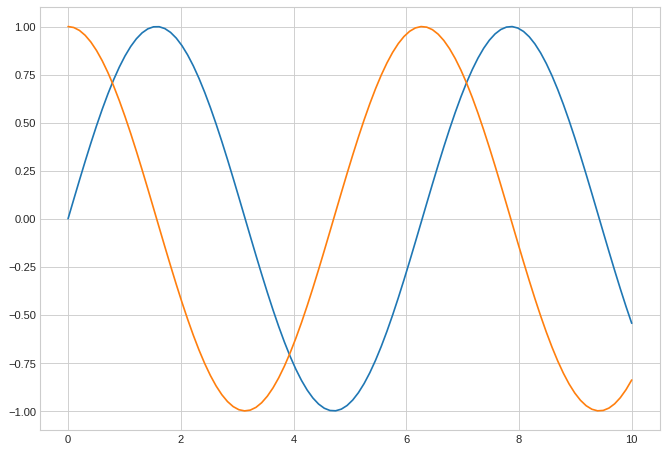

In [ ]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

Apesar de a biblioteca definir automaticamente cores diferentes para cada linha, é possível definí-las manualmente utilizando o parâmetro ``color``.

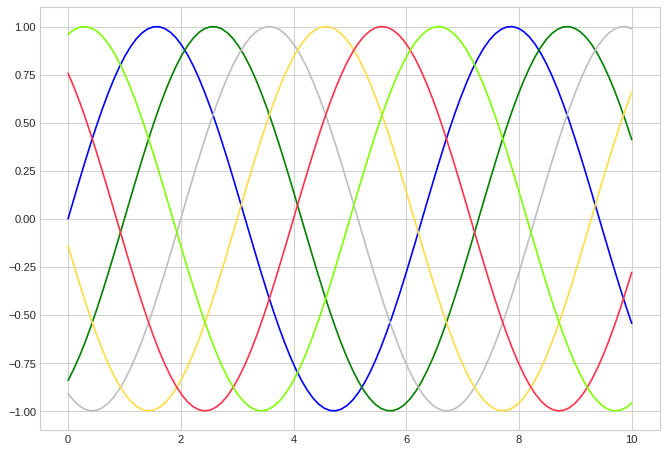

In [ ]:
plt.plot(x, np.sin(x - 0), color='blue')        # definindo a cor pelo nome
plt.plot(x, np.sin(x - 1), color='g')           # código de cor abreviado(rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # escala de cinza entre 0 e 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # código hexadecimal (RRGGBB de 00 a FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # tupla RGB, valores entre 0 e 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # códigos de cor HTML

De modo semelhante, também é possível definir o estilo da linha utilizando o parâmetro ``linestyle``. Essa configuração é especialmente útil quando é necessário criar gráficos em escala de cinza.

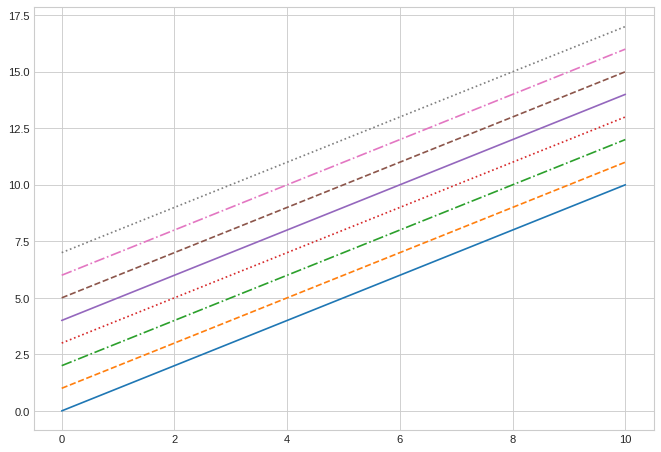

In [ ]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# Também é possível utilizar os seguintes códigos:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

Quando várias linhas estão sendo mostradas em um único eixo, pode ser útil criar uma legenda de plotagem que rotule cada tipo de linha. 

Isso é feito através do método ``plt.legend()``. Embora existam outras maneiras de fazer isso, a mais simples é especificar o rótulo de cada linha usando o parâmetro ``label`` da função plot:

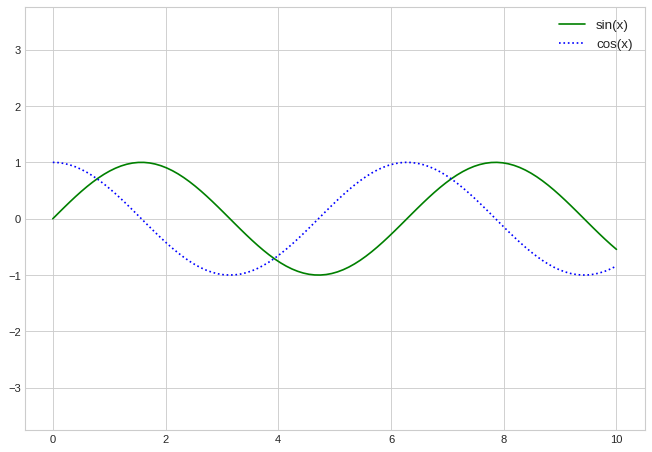

In [ ]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

### Gráfico de dispersão (x: numérico, y: numérico) 

Este tipo de gráfico mostra todos os pontos de dados individualmente. Aqui, eles não estão conectados com linhas. Cada ponto tem o valor do eixo x e o valor do eixo y. 

O gráfico de dispersão é geralmente utilizado para usado para exibir tendências ou correlações entre variáveis.

Para fazer um gráfico de dispersão com Matplotlib, podemos usar a função ``plt.scatter()``. Novamente, o primeiro argumento é usado para os dados no eixo horizontal, e o segundo para o eixo vertical.

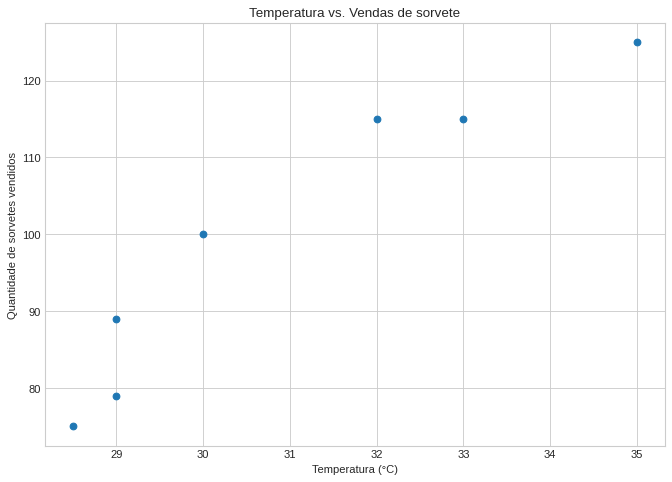

In [ ]:
temp = [30, 32, 33, 28.5, 35, 29, 29]
ice_creams_count = [100, 115, 115, 75, 125, 79, 89]

plt.scatter(temp, ice_creams_count)
plt.title("Temperatura vs. Vendas de sorvete")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Quantidade de sorvetes vendidos")
plt.show()

Existem duas formas de gerar um gráfico de dispersão no Matplotlib, utilizando a função ``plot()`` (sim, a mesma que utilizamos para os gráficos de linhas) e a função ``scatter()``. Vejamos a seguir como utilizá-las e suas diferenças.

#### Gráfico de dispersão com a função ``plot()``

Gerar um gráfico de dispersão com ``plt.plot()`` \ ``ax.plot()`` é tão simples quanto gerar um gráfico de linhas:

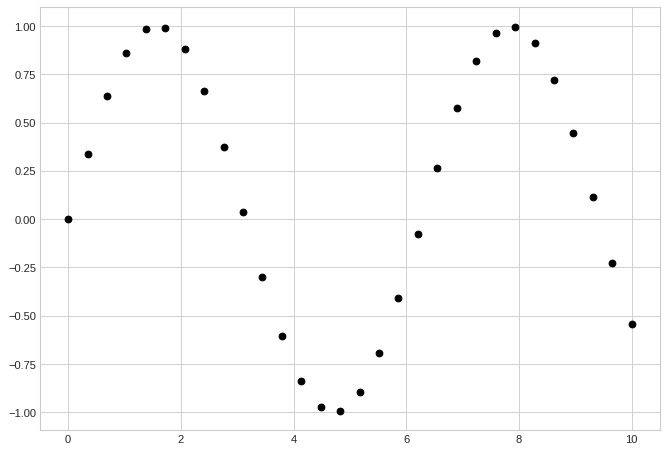

In [ ]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

O terceiro argumento na chamada de função é um caractere que representa o tipo de símbolo usado para a plotagem. Assim é possível atribuir ao parâmetro ``linestyle`` opções como ``'-'``, ``'--'`` para definir o estilo da linha, a função também dispõe do parâmetro ``marker`` com seu próprio conjunto de códigos para destacar os pontos no gráfico. 

A lista completa de símbolos disponíveis pode ser vista na documentação da função [``plt.plot()``](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html?highlight=plot#matplotlib.pyplot.plot). A maioria das possibilidades é bastante intuitiva. Segue abaixo alguns exemplos:

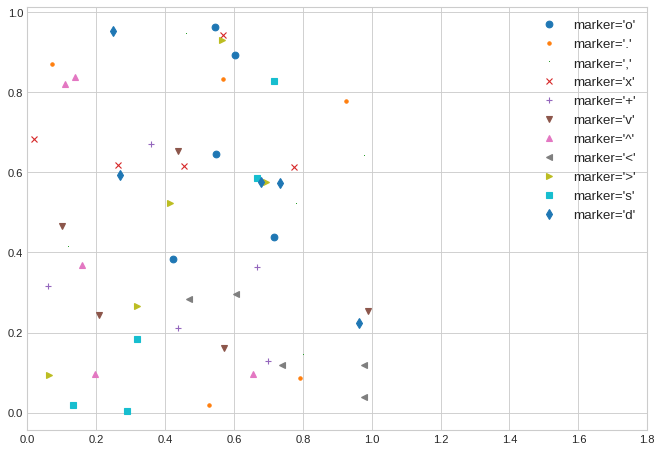

In [ ]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

Ainda é possível utlizar esses códigos de caracteres junto com os códigos de linha e cor para traçar pontos junto com uma linha conectando-os:

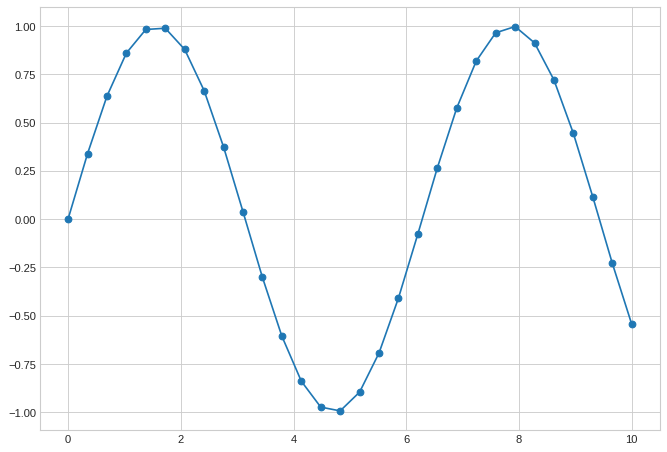

In [ ]:
plt.plot(x, y, linestyle='-', marker='o');

A função ``plt.plot()`` provê diversos parâmetros para customização de estilo de linhas e colunas, como pode ser visto abaixo. Para mais opções, consulte a [documentação da função](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html?highlight=plot#matplotlib.pyplot.plot). 

Text(0, 0.5, 'Rodada do brasileirão')

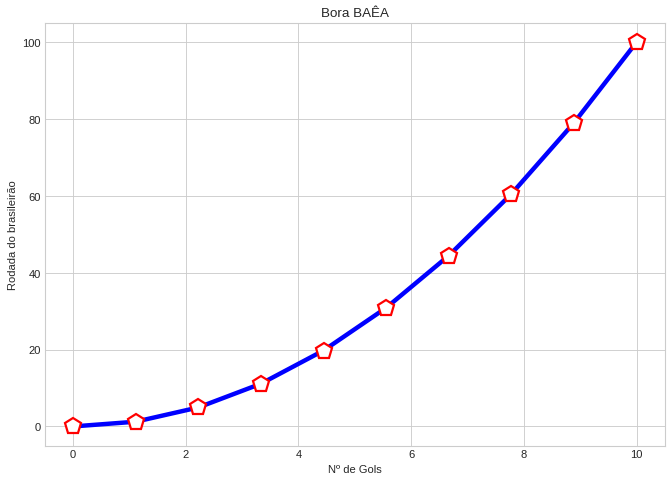

In [ ]:
x = np.linspace(0, 10, 10)
y = x**2


plt.title("Bora BAÊA")
plt.plot(x, y, '-p', color='blue',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='red',
         markeredgewidth=2)
plt.xlabel("Nº de Gols")
plt.ylabel("Rodada do brasileirão")


#### Gráficos de dispersão com a função ``plt.scatter()``

O segundo (e mais poderoso) método de criar gráficos de dispersão é a função `` plt.scatter()``, que pode ser usada de forma muito semelhante à função `` plt.plot()``:

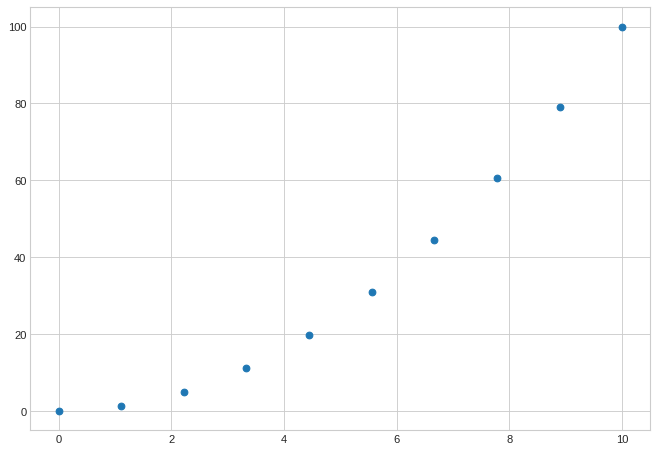

In [ ]:
plt.scatter(x, y, marker='o');

A principal diferença de ``plt.scatter()`` de `` plt.plot()`` é que ele pode ser usado para criar gráficos de dispersão onde as propriedades de cada ponto individual (tamanho, cor, cor da borda, etc.) podem ser controlados individualmente ou mapeados para os dados.

Vamos mostrar isso criando um gráfico de dispersão aleatório com pontos de muitas cores e tamanhos.
Para ver melhor os resultados sobrepostos, também usaremos o parâmetro ``alpha`` para ajustar o nível de transparência:

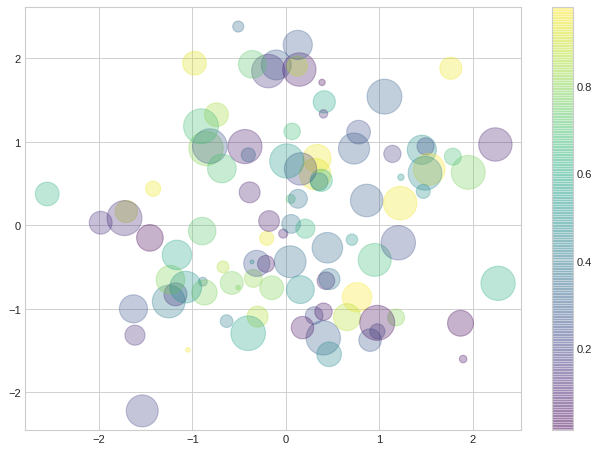

In [ ]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # exibir a escala de cor

Observe que o argumento de cor é automaticamente mapeado para uma escala de cores (mostrado aqui pelo comando ``colorbar()``), e que o argumento de tamanho é dado em pixels.

Desta forma, a cor e o tamanho dos pontos podem ser usados para transmitir informações na visualização, a fim de visualizar dados multidimensionais.

Por exemplo, podemos usar os dados Iris do Scikit-Learn, onde cada amostra é um dos três tipos de flores cujo tamanho de suas pétalas e sépalas foi medido cuidadosamente:

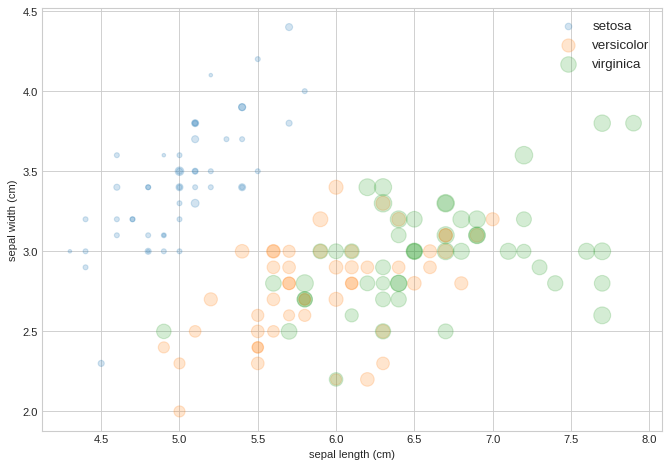

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

fig, ax = plt.subplots()
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
for i, color in enumerate(['tab:blue', 'tab:orange', 'tab:green']):
    x_index = np.where(iris.target == i )
    ax.scatter(features[0, x_index], features[1, x_index], alpha=0.2,
            s=100*features[3, x_index], c=color, label = iris.target_names[i])
ax.legend()
plt.show()

Podemos ver que este gráfico de dispersão nos deu a capacidade de explorar simultaneamente quatro dimensões diferentes dos dados:

A localização (x, y) de cada ponto corresponde ao comprimento e largura da sépala, o tamanho dos pontos está relacionado à largura da pétala e a cor está relacionada a uma espécie particular de flor.

Gráficos de dispersão como este podem ser muito úteis para exploração e apresentação de dados.

#### ``plt.plot()`` x ``plt.scatter()``

Dado o que vimos acima, é evidente que a função ``plt.scatter()`` permite a criação de gráficos com visualizações mais complexas que a ``plt.plot()``. Contudo, sua maior vantagem é também a sua desvantagem. 

Embora não importe tanto para pequenas quantidades de dados, conforme os conjuntos de dados ficam maiores do que alguns milhares de pontos, ``plt.plot()`` pode ser visivelmente mais eficiente do que ``plt.scatter()``. O motivo é que ``plt.scatter()`` tem a capacidade de renderizar um tamanho e / ou cor diferente para cada ponto, então o renderizador deve fazer o trabalho extra de construir cada ponto individualmente. 

Por outro lado, para o ``plt.plot()`` os pontos são basicamente clones uns dos outros, portanto, o trabalho de determinar a aparência dos pontos é feito apenas uma vez para todo o conjunto de dados. 

Assim sendo, a diferença entre esses dois pode levar a um desempenho muito diferente e, por esse motivo, ``plt.plot()`` deve ser preferido em vez de ``plt.scatter()`` para conjuntos de dados muito grandes.

### Gráfico de barras (x: categórico, y: numérico) 

y geralmente é a contagem de x.

Representa dados categóricos com barras retangulares. Cada barra possui uma altura que corresponde ao valor que representa. É útil quando queremos comparar um determinado valor numérico em diferentes categorias.

Para fazer um gráfico de barras com Maplotlib, precisamos da função ``plt.bar()``.

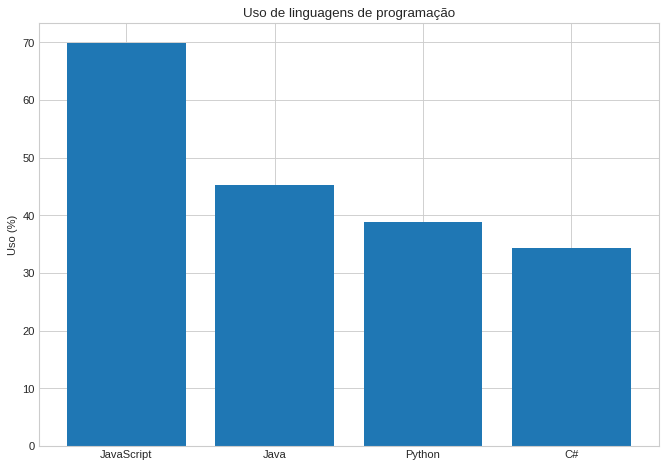

In [ ]:
labels = ["JavaScript", "Java", "Python", "C#"]
usage = [69.8, 45.3, 38.8, 34.4]

plt.bar(labels, usage)

#plt.xticks(range(len(labels)), labels)
plt.ylabel("Uso (%)")
plt.title("Uso de linguagens de programação")
plt.show()

# Também é possível adicionar mais dimensões ao gráfico incluindo mais barras agrupadas por x.

In [ ]:
import pandas as pd

raw_data = {'deaths': [523, 52, 25, 616],
            'veterans': [1, 5, 62, 26],
            'deserters': [4, 24, 31, 2],
            'origin': ['Arizona', 'California', 'Texas', 'Florida']}

army = pd.DataFrame(raw_data)
army

,deaths,veterans,deserters,origin
0,523,1,4,Arizona
1,52,5,24,California
2,25,62,31,Texas
3,616,26,2,Florida


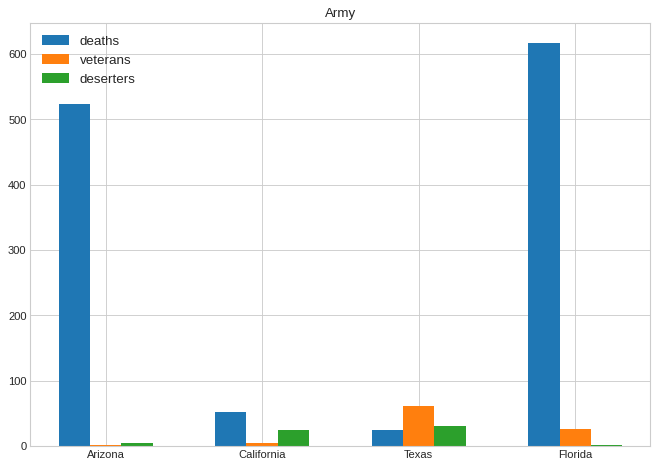

In [ ]:
x = np.arange(len(army['origin']))  # pontos do eixo x
width = 0.2  # largura das barras

fig, ax = plt.subplots()
deaths = ax.bar(x - width, army['deaths'], width, label='deaths')
veterans = ax.bar(x, army['veterans'], width, label='veterans')
deserters = ax.bar(x + width, army['deserters'], width, label='deserters')

ax.set_title('Army')
ax.set_xticks(x)
ax.set_xticklabels(army['origin'])
ax.legend()

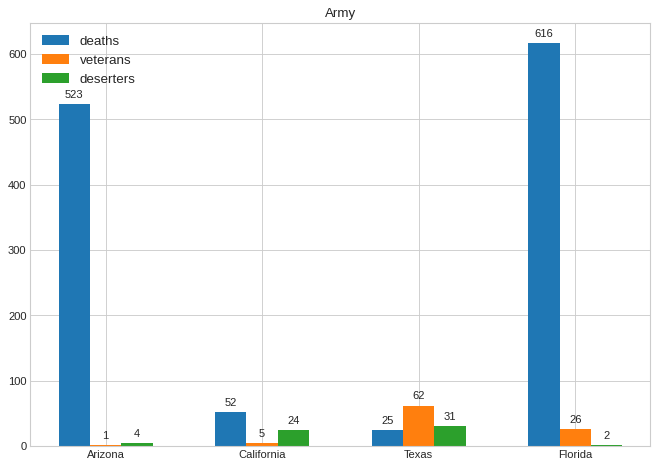

In [ ]:
def autolabel(bars):
    #Adicionar um rótulo acima de cada barra, exibindo o valor que representa
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 10, 
                height, horizontalalignment='center')
        

autolabel(deaths)
autolabel(veterans)
autolabel(deserters)
fig

Outra opção é exibir um gráfico com as barras empilhadas

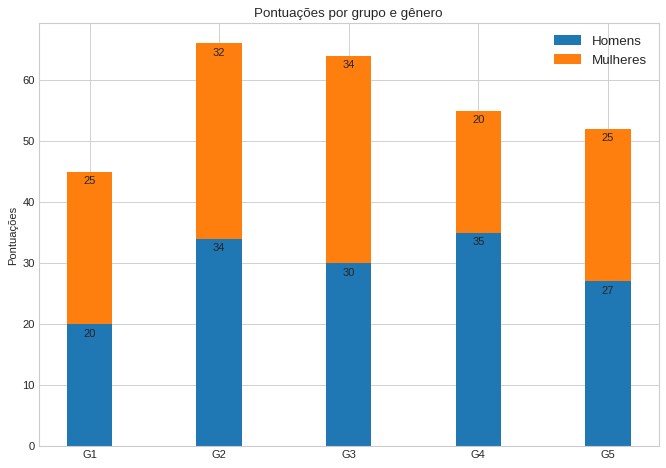

In [ ]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # posições em x
width = 0.35  # largura das barras

fig, ax = plt.subplots()
ax.bar(x, men_means, width, label='Homens')
ax.bar(x, women_means, width, label='Mulheres', bottom=men_means)


for i in range(len(labels)):
    ax.text(i, men_means[i]-2, men_means[i], horizontalalignment='center')
    ax.text(i, men_means[i]+women_means[i]-2, women_means[i], horizontalalignment='center')

ax.set_ylabel('Pontuações')
ax.set_title('Pontuações por grupo e gênero')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

### Histograma (x: numérico, y: numérico). 

x é combinado em grupos, tornando-se uma variável categórica, e y é geralmente a contagem desta variável categórica.

O histograma é uma representação precisa da distribuição de dados numéricos.

Para criar um histograma, primeiro dividimos todo o intervalo de valores em uma série de intervalos e, em seguida, contamos quantos valores caem em cada intervalo. 

Os intervalos também são chamados de *bins*. Os *bins* são intervalos consecutivos e não sobrepostos de uma variável. Eles devem ser adjacentes e geralmente são da mesma largura.

Para fazer um histograma com Matplotlib, podemos usar a função ``plt.hist()``. O primeiro argumento são os dados numéricos, o segundo argumento é o número de *bins*. O valor padrão para o argumento *bins* é 10.

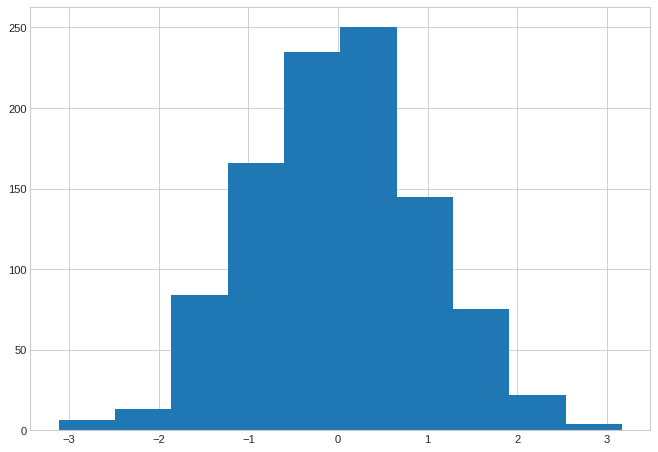

In [ ]:
data = np.random.randn(1000)
plt.hist(data);

A função ``hist()`` possui algumas opções para ajustar o cálculo e a exibição do gráfico. Aqui está um exemplo de um histograma mais personalizado:

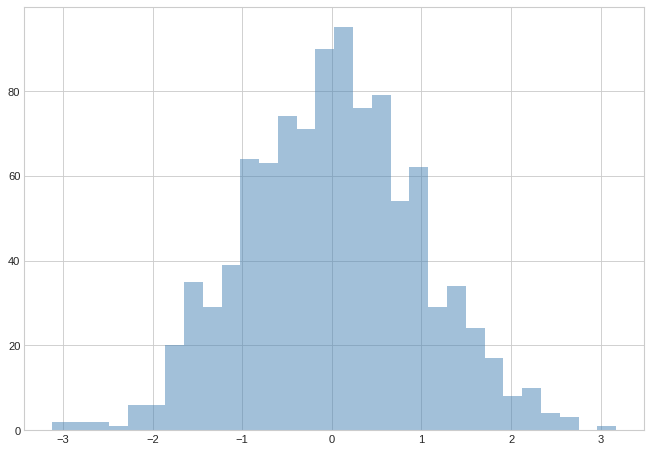

In [ ]:
plt.hist(data, bins=30, color='steelblue', alpha=0.5);

Uma personalização a nível de manipulação dos dados disponível é exibir o histograma dos dados em escala logarítmica.

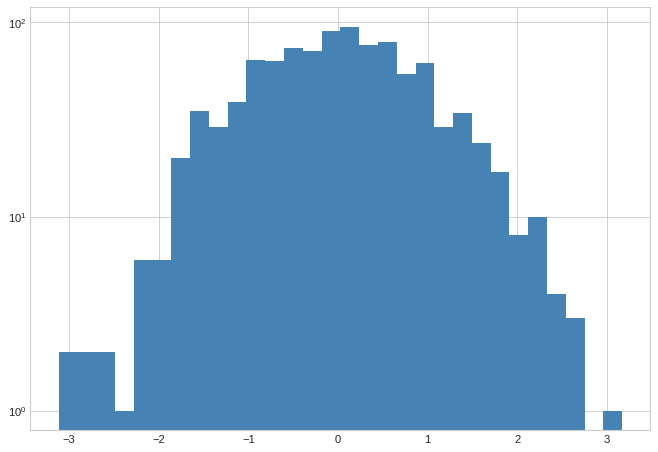

In [ ]:
plt.hist(data, bins=30, color='steelblue', log=True);

Para conhecer outras opções de personalização, visite a [documentação da função](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html?highlight=hist#matplotlib.axes.Axes.hist).

Outra grande utilidade do histograma é a comparação de distribuições de diferentes conjuntos de dados.

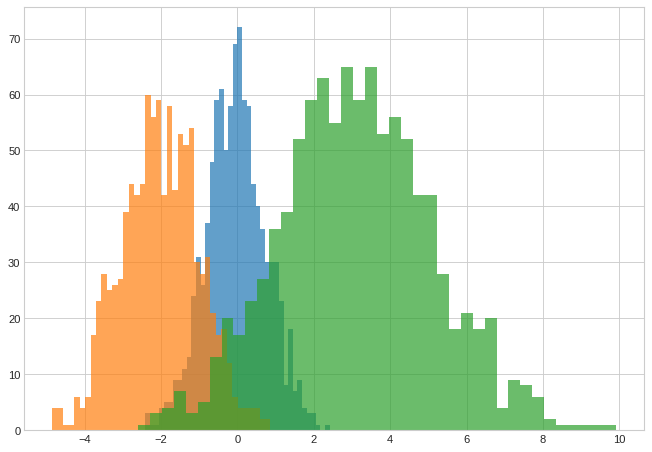

In [ ]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.7, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

### Boxplot (x: categórico, y: numérico)

O gráfico mostrano eixo y a distribuição de cada valor categoria no eixo x, destacando marcadores de estatística descritiva (mínimo, máximo, mediana e quartiles)

![](http://www.physics.csbsju.edu/stats/simple.box.defs.gif)


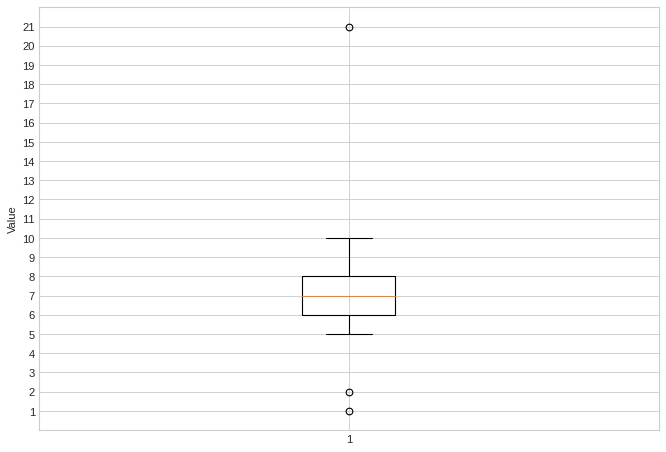

In [ ]:
values = [1, 2, 5, 6, 6, 7, 7, 8, 8, 8, 9, 10, 21]

plt.boxplot(values)
plt.yticks(range(1, 22))
plt.ylabel("Value")
plt.show()

Neste exemplo, os valores 1, 2 e 21 são outliers, o máximo é 10, o mínimo é 5 e a mediana é 7.

Um uso comum do boxplot é comparar distribuições de diferentes variáveis numéricas.

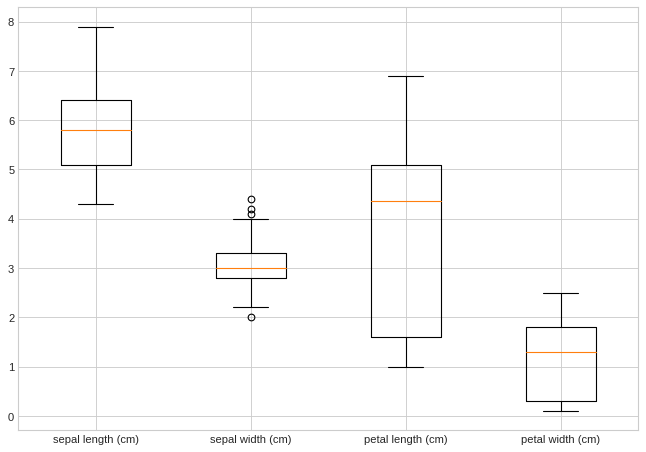

In [ ]:
plt.boxplot(iris.data);
plt.xticks(ticks=range(1, len(iris.feature_names) +1),labels=iris.feature_names);

Como pode ser observado acima, a variável *peal length (cm)* é a que possui maior variabilidade em seu dados. Será que existe uma distinção acentuada no tamanho da pétala entre os tipos de flor catalogados?

Text(0, 0.5, 'Tamanho da pétala')

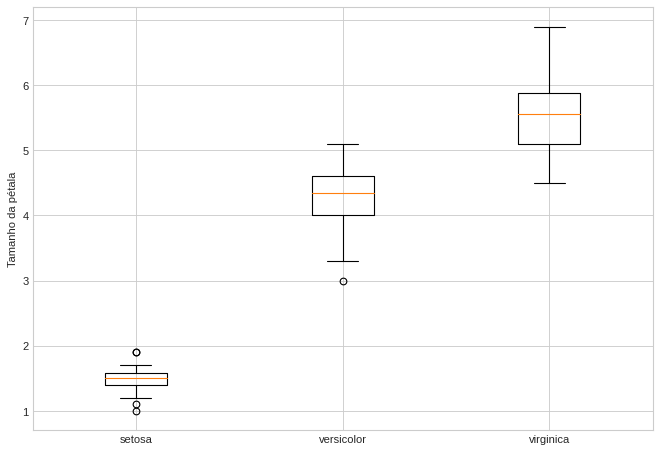

In [ ]:
setosa_petal_length = iris.data[np.where(iris.target == 0)][:,2]
virginica_petal_length = iris.data[np.where(iris.target == 1)][:,2]
versicolor_petal_length = iris.data[np.where(iris.target == 2)][:,2]

plt.boxplot([setosa_petal_length, virginica_petal_length, versicolor_petal_length])
plt.xticks(ticks=range(1, len(iris.target_names) +1),labels=iris.target_names)
plt.ylabel("Tamanho da pétala")

É notório que as flores do tipo setosa têm pétalas destacavelmente menores que as demais, assim como as flores virginica têm pétalas maiores e as flores versicolor possuem tamanho mediano.

## Múltiplos subplots

Frequentemente nos deparamos com situações onde é útil comparar diferentes visões de dados lado a lado. Para tanto, Matplotlib possui o conceito de *subplots*: grupos de painéis que podem coexistir em uma única figura.

Nesta seção, exploraremos quatro rotinas para a criação de subplots no Matplotlib.

### ``plt.axes()``: subplots "manualmente"

O método mais básico de criação de eixos é usar a função ``plt.axes()``. Por padrão, ela cria um objeto de eixos padrão que preenche a figura inteira. 

`` plt.axes()`` também recebe um argumento opcional que é uma lista de quatro números indicando coordenadas de posicionamento na figura. Esses números representam ``[esquerda, inferior, largura, altura]``, que varia de 0 na parte inferior esquerda da figura a 1 na parte superior direita da figura.

Por exemplo, podemos criar painéis inseridos no canto superior direito de outros painéis definindo a posição *x* e *y* para 0,65 (ou seja, começando com 65% da largura e 65% da altura da figura) e a altura e largura para 0,2 (ou seja, o tamanho dos eixos será de 20% da largura e 20% da altura da figura):

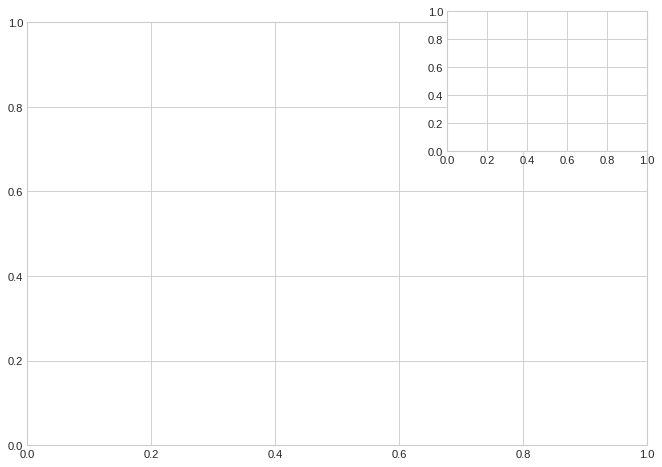

In [ ]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.25, 0.25])

O equivalente a este comando dentro da interface orientada a objetos é `` fig.add_axes()``. Vamos usá-lo para criar dois eixos empilhados verticalmente:

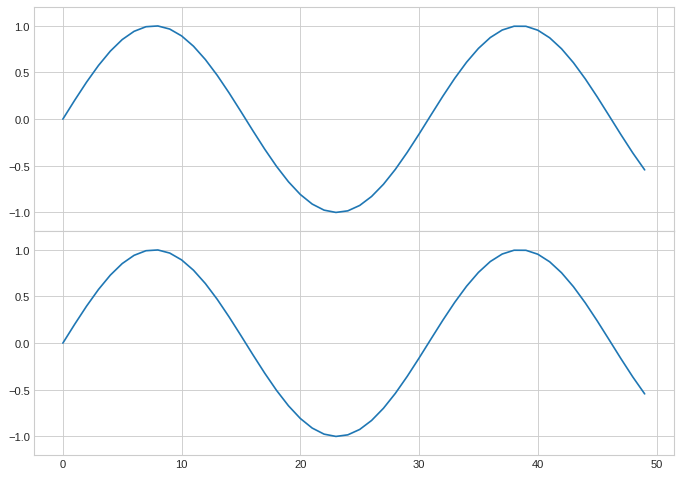

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.sin(x));

Agora temos dois painéis que estão apenas se tocando: a parte inferior do painel superior (na posição 0,5) corresponde ao topo do painel inferior (na posição 0,1 + 0,4).

### ``plt.subplot()``: Grades simples de subplots

Colunas ou linhas alinhadas de subplots são uma necessidade comum o suficiente para que Matplotlib tenha várias rotinas de conveniência que as tornam fáceis de criar.

A função mais básica é `` plt.subplot() ``, que cria um único subplot dentro de uma grade. Como você pode ver abaixo, este comando leva três argumentos inteiros - o número de linhas, o número de colunas e o índice do gráfico a ser criado. A contagem dos índices começa do canto superior esquerdo da grade e encerra no canto inferior direito.

**Atenção: observe abaixo que os índices dos subplots começam de 1 e não de 0, como na maioria das vezes em que trabalhamos com índices em Python.**

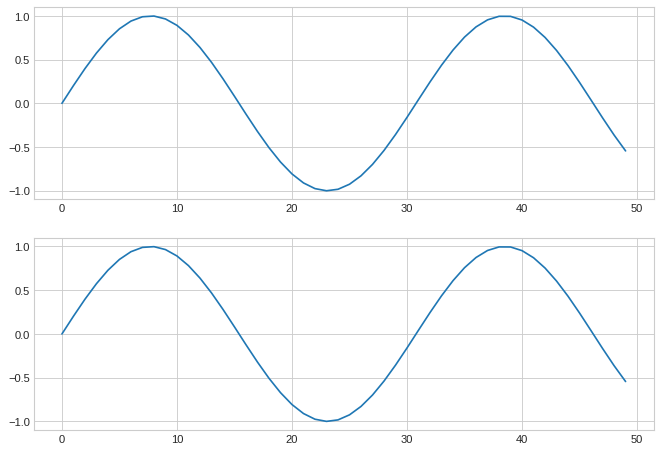

In [ ]:
plt.subplot(2,1, 1)
plt.plot(np.sin(x))

plt.subplot(2,1, 2)
plt.plot(np.sin(x))
plt.show()

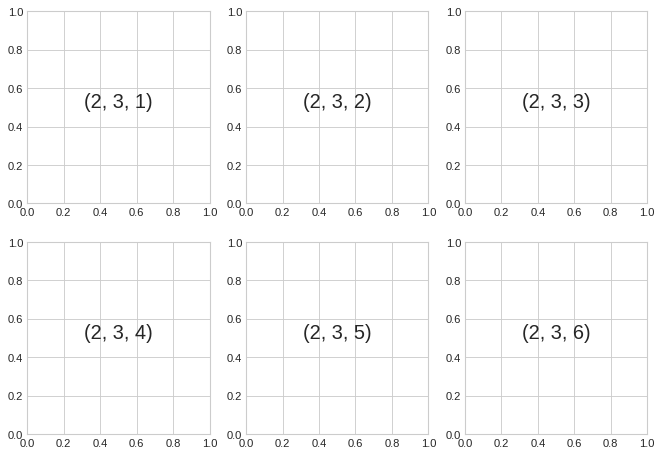

In [ ]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

O código a seguir usa o comando orientado a objetos equivalente, `` fig.add_subplot() ``:

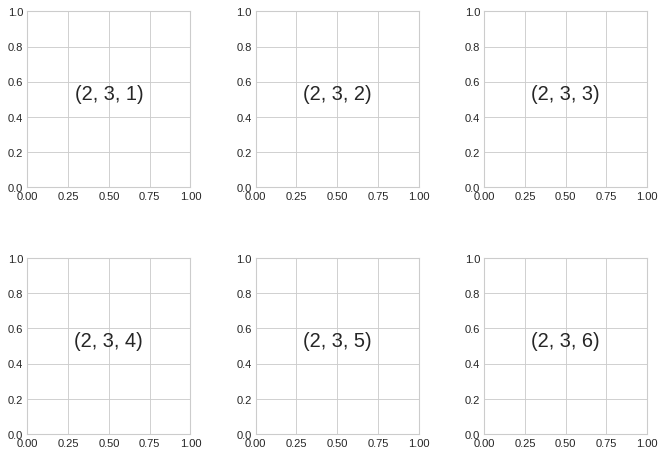

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4) #define um espaçamento entre os  painéis
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')
    
axes = fig.get_axes()

Os argumentos ``hspace`` e ``wspace`` de ``plt.subplots_adjust()`` especificam o espaçamento ao longo da altura e largura da figura, em unidades proporcionais ao tamanho do subplot (neste caso, o espaço é 40% da altura do painel).

### `` plt.subplots``: toda a grade de uma só vez

A abordagem que acabamos de descrever pode se tornar muito tediosa quando precisamos criar uma grande grade de subplots. Para este propósito, `` plt.subplots()`` é a função mais apropriada (observe o `` s`` no final de `` subplots``). Em vez de criar um único subplot, esta função cria uma grade completa de subplots em uma única linha, retornando-os em uma matriz NumPy.

Os argumentos são o número de linhas e o número de colunas, junto com os parâmetros opcionais ``sharex`` e ``sharey``, que permitem a você especificar as relações entre os diferentes eixos.

Aqui, criaremos uma grade $ 2 \times 3 $ de subplots, onde todos os gráficos na mesma linha compartilham a mesma escala no eixo y e todos os gráficos na mesma coluna compartilham sua escala no eixo x:

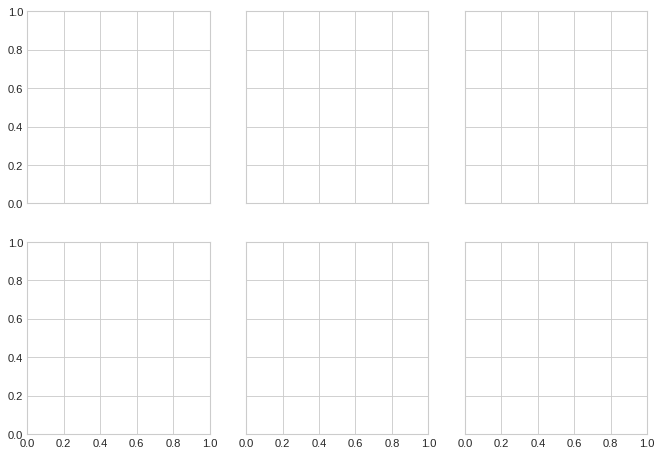

In [ ]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Observe que, ao especificar ``sharex`` e ``sharey``, removemos automaticamente os rótulos internos da grade para tornar o gráfico mais limpo. 

A grade resultante de instâncias de eixos é retornada dentro de uma matriz NumPy, permitindo a especificação conveniente dos eixos desejados usando a notação de indexação de matriz padrão:

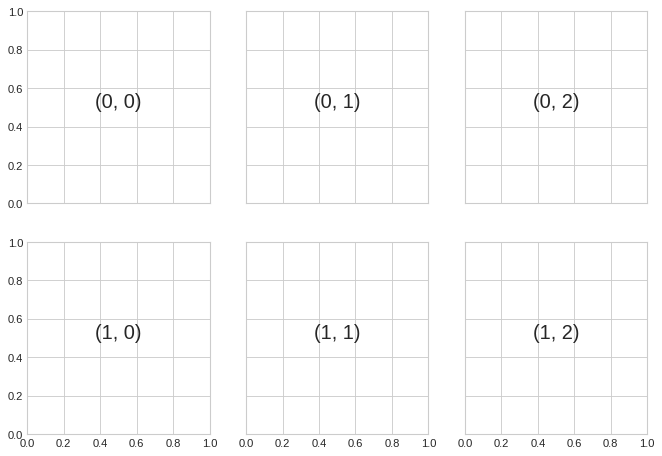

In [ ]:
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

Como você pode observar acima, diferentemente da função ``plt.subplot()``, ``plt.subplots()`` trabalha com a indexação iniciada em zero.

### `` plt.GridSpec``: arranjos mais complicados

Para ir além de uma grade regular para subplots que abrangem várias linhas e colunas, ``plt.GridSpec()`` é a ferramenta mais completa.

O objeto ``plt.GridSpec()`` não cria um gráfico por si mesmo; é simplesmente uma interface conveniente que é reconhecida pelo comando ``plt.subplot()``.
Por exemplo, um gridspec para uma grade de duas linhas e três colunas com algum espaço de largura e altura especificado é criado assim:

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

A partir disso, podemos especificar os locais dos subplots e até mesmo estendê-los entre linhas e/ou colunas usando a familiar sintaxe de fatiamento do Python:

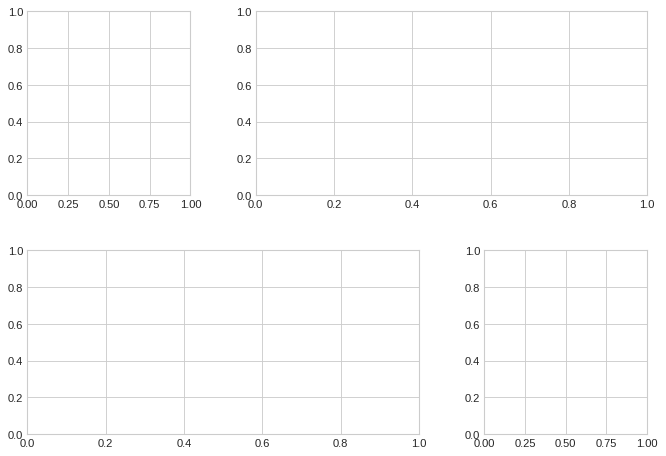

In [ ]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

Este tipo de flexibilidade tem uma ampla gama de usos. Um exemplo pode ser visto abaixo:

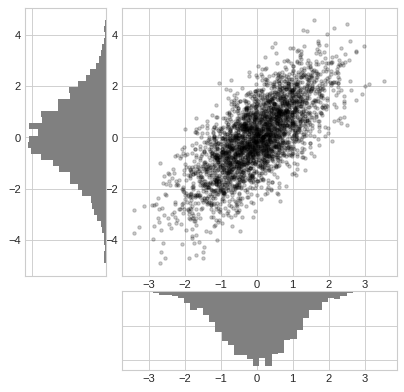

In [ ]:
# criar alguns dados normalmente distribuídos
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Define os painéis com gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# gráfico de dispersão no painel principal
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogramas nos painéis secundários
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()